In [1]:
import os
import pickle
import numpy as np
from PIL import Image
from collections import OrderedDict
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import time

In [2]:
model_list = []

In [3]:
for file in os.listdir("./rotate"):
    if file.startswith("model_name_"):
        print(os.path.join("./rotate", file))
        with open(os.path.join("./rotate", file), "rb") as f:
            model_list_partial = pickle.load(f)
        for model in model_list_partial:
            model_list.append(model.split("/")[-2])
    #break

./rotate\model_name_0
./rotate\model_name_1000
./rotate\model_name_2000
./rotate\model_name_3000
./rotate\model_name_5000
./rotate\model_name_6000
./rotate\model_name_7000
./rotate\model_name_8000
./rotate\model_name_9000


In [6]:
syn_loss = np.zeros(shape=len(model_list))

In [9]:
for i, model in enumerate(model_list):
    #print(model)
    #break
    if i >= 1000:
        break
    if i >= 4000:
        idx = i + 1000
    else:
        idx = i
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            syn_loss[i] += np.mean(np.abs(realimg - synimg))
    syn_loss[i] /= 54
    print(syn_loss[i] / 256 * 3.)
    #break
print(np.mean(syn_loss) / 256. * 3)

0.3529939276200753
0.3151359050362197
0.42009911092384045
0.34674313088012826
0.2925921561623142
0.4095156386555958
0.3558433566891445
0.3028133924442391
0.30141866337942325
0.37010270218136226
0.28945749777334717
0.40281669740323656
0.2874121136135526
0.35575232682404695
0.27838818673734317
0.47858135788529016
0.3186986490532204
0.44263984538890705
0.2655599602946529
0.38883061320693413
0.3579021559821235
0.2586603959401448
0.4623315819987544
0.3957920471827189
0.38526614065523523
0.25136843875602444
0.2589695983462863
0.4094583458370633
0.3226687025140833
0.2309415649484705
0.2986695987206919
0.40104105295958337
0.3348603601808902
0.4587179775591247
0.40739268726772726
0.34308900656523533
0.4057835384651466
0.2755574915144179
0.286848545074463
0.30036864457307033
0.41826851721163144
0.2823591541360926
0.2911753036357739
0.25113263836613414
0.4121887154049344
0.3230456599482784
0.34426681200663245
0.3942931802184493
0.4380470955813373
0.25095710489485
0.36361085927044895
0.19994954709

0.43573022330248784
0.4044234443593908
0.4786859706596093
0.40770129804258
0.37405878526193115
0.4118262441069991
0.4800954041657624
0.35251428021324993
0.41268301010131836
0.3922377427419027
0.29043864320825646
0.44394750506789604
0.3618412415186564
0.29720529803523316
0.32377556959788006
0.4305314708639074
0.41179117450007685
0.26358826513643624
0.37015148445411966
0.3057631298347755
0.3314692444271511
0.2978262150729144
0.3725916456293176
0.3782381878958808
0.32527434825897217
0.2570341295666165
0.310812027366073
0.31905387949060515
0.28818908002641463
0.312825600306193
0.3853692301997431
0.2976125831957217
0.3973969441873054
0.3915287830211498
0.3894410928090414
0.359379839014124
0.42674879674558275
0.3475978551087555
0.4044525358412001
0.26785246531168616
0.30245474091282587
0.3736647102567884
0.31842182742224795
0.3763381595964784
0.3813616964552138
0.31784477057280375
0.38060787430515997
0.339194589191013
0.2770552811799226
0.286009603076511
0.3409514118123938
0.3671478607036449

0.2503979824207446
0.37269688094103776
0.42006970334936067
0.3470900588565402
0.3360167874230279
0.2814929617775811
0.30668620268503827
0.43961999151441794
0.3304935517134489
0.27031316580595793
0.3002056589833013
0.36772199913307474
0.32692487151534466
0.3482560669934308
0.3424327859172115
0.35497860555295596
0.35837352275848383
0.336556147646021
0.3684650571257979
0.43898389957569267
0.3654197057088218
0.39410368159965226
0.42198406325446236
0.37146258795702913
0.3047220442030166
0.2370318836636014
0.45020774117222545
0.44212672445509166
0.30154518286387116
0.3051598557719478
0.3933191431893242
0.3765999696872853
0.4006079700258044
0.3760211291136565
0.2781022742942527
0.32110204961564814
0.4159566031561958
0.4036889826809919
0.35464300049675834
0.23293574651082355
0.27387094939196543
0.34640023884949855
0.29654214117262107
0.25379741191864014
0.3705298061724063
0.27706642945607507
0.36936495480714016
0.31995484564039445
0.2795231342315674
0.45663035798955864
0.3190419409010145
0.372

In [10]:
model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(synimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        synimg_refined[i, j] = candidate_pixel
            refine_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refinedloss: ", refine_loss[idx])
    if idx >= 1000:
        break
    
print(np.mean(refine_loss) / 256. * 3)

synloss:  30.122148490246424 , refinedloss:  29.786105309003673
synloss:  26.891597229757416 , refinedloss:  26.324140760633675
synloss:  35.84845746550105 , refinedloss:  32.64784749348958
synloss:  29.58874716843761 , refinedloss:  27.347946732132527
synloss:  24.96786399251748 , refinedloss:  24.239599534022958
synloss:  34.94533449861084 , refinedloss:  31.34985125506366
synloss:  30.365299770807 , refinedloss:  29.654202684944067
synloss:  25.840076155241736 , refinedloss:  30.77335084514854
synloss:  25.72105927504412 , refinedloss:  25.594258626302082
synloss:  31.58209725280958 , refinedloss:  33.492481749734765
synloss:  24.700373143325624 , refinedloss:  23.895706365137933
synloss:  34.373691511742855 , refinedloss:  31.488715654538005
synloss:  24.525833695023156 , refinedloss:  23.604705433786652
synloss:  30.35753188898534 , refinedloss:  32.491259916329085
synloss:  23.75579193491995 , refinedloss:  21.948024796850884
synloss:  40.83894253954476 , refinedloss:  38.4894458

synloss:  26.269412193769288 , refinedloss:  28.834980529031636
synloss:  30.062565556278937 , refinedloss:  28.82483249240451
synloss:  21.42890496901524 , refinedloss:  21.00450416847512
synloss:  39.19370147328317 , refinedloss:  40.24540164146893
synloss:  39.86755860882041 , refinedloss:  37.86417040412809
synloss:  24.783140959563084 , refinedloss:  31.44568285529996
synloss:  31.19643486870659 , refinedloss:  29.61831062222704
synloss:  30.280291898750967 , refinedloss:  33.34104636863425
synloss:  22.069317099488813 , refinedloss:  22.21275047019676
synloss:  36.98357965916764 , refinedloss:  38.081662778501155
synloss:  30.333542812017747 , refinedloss:  26.908730589313272
synloss:  24.64170328776042 , refinedloss:  23.627504325207365
synloss:  20.944718725887338 , refinedloss:  20.116401578173228
synloss:  23.07409065152392 , refinedloss:  23.110481168016978
synloss:  39.26817604347512 , refinedloss:  36.6002483603395
synloss:  31.67168285228588 , refinedloss:  30.45551554361

synloss:  40.41391631703319 , refinedloss:  39.00714186680169
synloss:  29.970550913869587 , refinedloss:  29.363241690176505
synloss:  25.931595790533375 , refinedloss:  25.397158399040315
synloss:  39.41663351176697 , refinedloss:  35.716400523244594
synloss:  23.993408579885223 , refinedloss:  21.489949544270843
synloss:  29.09250141661844 , refinedloss:  26.308415919174383
synloss:  28.078795633198297 , refinedloss:  26.32937245310088
synloss:  37.05583548840181 , refinedloss:  35.787271005136
synloss:  34.723213101610725 , refinedloss:  33.74983309522087
synloss:  26.63860820252219 , refinedloss:  27.93145902657215
synloss:  27.390245602454677 , refinedloss:  29.981311185860335
synloss:  31.474349410445615 , refinedloss:  31.514909532335068
synloss:  33.954437632619594 , refinedloss:  33.48144493573977
synloss:  37.29425086504147 , refinedloss:  40.21923300660687
synloss:  25.737996796031055 , refinedloss:  23.00963828004436
synloss:  30.02888695987653 , refinedloss:  31.421321539

synloss:  25.422409999517754 , refinedloss:  24.295417314694255
synloss:  35.829125298394096 , refinedloss:  35.16178536120756
synloss:  26.98772025402681 , refinedloss:  26.32795508113908
synloss:  25.25295606071566 , refinedloss:  26.698843120056907
synloss:  23.515193609543786 , refinedloss:  22.604053261839315
synloss:  34.665508882499026 , refinedloss:  30.909244113498264
synloss:  22.01771187487944 , refinedloss:  21.481148802203897
synloss:  26.400157410421496 , refinedloss:  26.117775245949073
synloss:  28.407104492187504 , refinedloss:  28.631953863450036
synloss:  36.72873489945024 , refinedloss:  34.32591115692515
synloss:  30.029736554181138 , refinedloss:  27.687335732542437
synloss:  33.00197949821566 , refinedloss:  34.72368857301311
synloss:  19.019185007354363 , refinedloss:  19.195779682677465
synloss:  28.738581904658574 , refinedloss:  25.708338607976472
synloss:  30.900655864197528 , refinedloss:  32.6377635061005
synloss:  26.638694103853204 , refinedloss:  25.986

synloss:  35.72258579583815 , refinedloss:  37.089043888044934
synloss:  31.07145408347801 , refinedloss:  28.779589994454096
synloss:  30.621022165557488 , refinedloss:  29.43439172815394
synloss:  28.859634587794176 , refinedloss:  25.136012324580445
synloss:  34.16486876687887 , refinedloss:  32.79036006221064
synloss:  32.16350263430749 , refinedloss:  33.48511910144193
synloss:  29.29075264636381 , refinedloss:  30.218834394290123
synloss:  23.001976860894093 , refinedloss:  22.96559463312596
synloss:  26.27908551251447 , refinedloss:  25.12535792221258
synloss:  34.76310372058256 , refinedloss:  29.075319643373845
synloss:  34.848166760103204 , refinedloss:  33.1137424045139
synloss:  32.482832543643894 , refinedloss:  30.246348063151036
synloss:  34.91435222861208 , refinedloss:  33.1740771635079
synloss:  28.346748634620955 , refinedloss:  25.79257013768326
synloss:  39.36609640239198 , refinedloss:  34.77565624095775
synloss:  27.27263311692227 , refinedloss:  28.2447777265383

synloss:  32.09246298707561 , refinedloss:  34.91819668993539
synloss:  41.291983522014846 , refinedloss:  39.146573667173044
synloss:  30.17298568913967 , refinedloss:  32.00221685715663
synloss:  24.211134545597027 , refinedloss:  24.325141059027775
synloss:  36.50194747359664 , refinedloss:  37.71427672586324
synloss:  40.480978883342964 , refinedloss:  38.703026665581596
synloss:  29.18956766010803 , refinedloss:  31.747747727382315
synloss:  34.11753713348766 , refinedloss:  30.824465904706788
synloss:  33.2989532093943 , refinedloss:  33.56654226044077
synloss:  35.46006643036265 , refinedloss:  36.64156727731964
synloss:  33.14051950713735 , refinedloss:  32.65546332465278
synloss:  43.09772482036072 , refinedloss:  40.078930890118635
synloss:  33.12293648425444 , refinedloss:  32.68455825617284
synloss:  34.18782928843557 , refinedloss:  33.71443760247878
synloss:  29.79167269483025 , refinedloss:  29.53736331139082
synloss:  17.434255340952934 , refinedloss:  17.55269632221739

synloss:  40.837513864776234 , refinedloss:  43.502342318311136
synloss:  26.595704255280676 , refinedloss:  27.05998286494502
synloss:  20.632381863064236 , refinedloss:  19.251474262755593
synloss:  25.14649944540895 , refinedloss:  26.381719141830633
synloss:  30.42258217894 , refinedloss:  32.03828298309702
synloss:  31.519454014154118 , refinedloss:  28.508811668113434
synloss:  31.1137537073206 , refinedloss:  29.001452033902392
synloss:  34.57010754243828 , refinedloss:  37.42330518180942
synloss:  38.56782550576293 , refinedloss:  40.09595781491125
synloss:  20.75843641493055 , refinedloss:  19.209108329113615
synloss:  40.75261433919271 , refinedloss:  44.647150863835854
synloss:  21.34165785047742 , refinedloss:  21.694442937403544
synloss:  36.86827596028646 , refinedloss:  33.979992148316946
synloss:  23.891529978057488 , refinedloss:  21.189641128351653
synloss:  39.907397234881365 , refinedloss:  39.823339014877504
synloss:  29.458728178047835 , refinedloss:  25.937047887

synloss:  29.556187382450812 , refinedloss:  31.519023377218364
synloss:  25.114220136477613 , refinedloss:  26.42056086033951
synloss:  26.905209765022185 , refinedloss:  30.11764752423321
synloss:  39.347629123263886 , refinedloss:  34.96257113233024
synloss:  26.682915958357444 , refinedloss:  26.51305172767168
synloss:  29.353634304470486 , refinedloss:  26.776431236738038
synloss:  24.251365002290708 , refinedloss:  23.440139958887926
synloss:  28.49211704583816 , refinedloss:  27.1956263412664
synloss:  39.100346317997676 , refinedloss:  38.99027468834394
synloss:  32.96813701111594 , refinedloss:  30.60765471281829
synloss:  26.269605471764088 , refinedloss:  26.52771071445795
synloss:  23.49854909637829 , refinedloss:  23.01329097041377
synloss:  34.138808262201 , refinedloss:  30.990446867766202
synloss:  24.683156708140427 , refinedloss:  25.568405716507524
synloss:  23.594192316502706 , refinedloss:  23.303508240499614
synloss:  39.214213053385414 , refinedloss:  35.61502791

In [12]:
def get_dist(a, b):
    aa = (a * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180.
    bb = (b * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180
    posa = np.array([np.cos(aa[1]) * np.sin(aa[0]), np.cos(aa[1]) * np.cos(aa[0]), np.sin(aa[1])])
    posb = np.array([np.cos(bb[1]) * np.sin(bb[0]), np.cos(bb[1]) * np.cos(bb[0]), np.sin(bb[1])])
    return np.linalg.norm(posa - posb)

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_dist_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(np.append(synimg[i, j], [az, el]))
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            dist = get_dist(color_vp[-2:], [az, el])
                            candidate_pixel += color * np.exp(-dist)
                            candidate_weight += np.exp(-dist)
                        synimg_refined[i, j] = candidate_pixel / candidate_weight
            refine_dist_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_dist_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refineddistloss: ", refine_dist_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(refine_dist_loss) / 256. * 3)

synloss:  30.122148490246424 , refineddistloss:  29.74105495876735
synloss:  26.891597229757416 , refineddistloss:  26.340792809003663
synloss:  35.84845746550105 , refineddistloss:  32.742089919102035
synloss:  29.58874716843761 , refineddistloss:  27.501676959755972
synloss:  24.96786399251748 , refineddistloss:  24.249764148099914
synloss:  34.94533449861084 , refineddistloss:  31.39082242235726
synloss:  30.365299770807 , refineddistloss:  29.76420762803819
synloss:  25.840076155241736 , refineddistloss:  30.71552794656636
synloss:  25.72105927504412 , refineddistloss:  25.471185001326187
synloss:  31.58209725280958 , refineddistloss:  33.47562210648149
synloss:  24.700373143325624 , refineddistloss:  23.939386438440394
synloss:  34.373691511742855 , refineddistloss:  31.654123942057286
synloss:  24.525833695023156 , refineddistloss:  23.545621895495763
synloss:  30.35753188898534 , refineddistloss:  32.4719302330488
synloss:  23.75579193491995 , refineddistloss:  22.18989431122202

In [13]:
root_path = "./"

vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3))

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_info_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(np.append(synimg[i, j], [az, el]))
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            candidate_pixel += color * np.exp(-vsmat[el, az])
                            candidate_weight += np.exp(-dist)
                        synimg_refined[i, j] = candidate_pixel / candidate_weight
            refine_info_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_info_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refineddistloss: ", refine_info_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(refine_info_loss) / 256. * 3)

synloss:  30.122148490246424 , refineddistloss:  34.73182960792824
synloss:  26.891597229757416 , refineddistloss:  36.74083229347512
synloss:  35.84845746550105 , refineddistloss:  31.792358398437486
synloss:  29.58874716843761 , refineddistloss:  33.658621328848376
synloss:  24.96786399251748 , refineddistloss:  31.31143828968943
synloss:  34.94533449861084 , refineddistloss:  36.74915869442033
synloss:  30.365299770807 , refineddistloss:  28.10314376265914
synloss:  25.840076155241736 , refineddistloss:  18.093317856023337
synloss:  25.72105927504412 , refineddistloss:  35.65472449785397
synloss:  31.58209725280958 , refineddistloss:  29.566520785108032
synloss:  24.700373143325624 , refineddistloss:  30.178849962022564
synloss:  34.373691511742855 , refineddistloss:  39.336376425660696
synloss:  24.525833695023156 , refineddistloss:  24.689374005353006
synloss:  30.35753188898534 , refineddistloss:  28.332566626277966
synloss:  23.75579193491995 , refineddistloss:  30.5228350604021

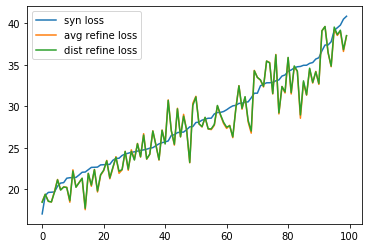

In [23]:
plt.plot(syn_loss[:100][np.argsort(syn_loss[:100])], label="syn loss")
plt.plot(refine_loss[:100][np.argsort(syn_loss[:100])], label="avg refine loss")
plt.plot(refine_dist_loss[:100][np.argsort(syn_loss[:100])], label="dist refine loss")
#plt.plot(refine_info_loss[:100][np.argsort(syn_loss[:100])], label="info refine loss")
plt.legend()

In [24]:
print("syn loss:", np.mean(syn_loss[:100]) / 256. * 3)
print("avg refine loss:", np.mean(refine_loss[:100]) / 256. * 3)
print("dist refine loss:", np.mean(refine_dist_loss[:100]) / 256. * 3)
print("info refine loss", np.mean(refine_info_loss[:100]) / 256. * 3)

syn loss: 0.33170774445203427
avg refine loss: 0.32485504636058093
dist refine loss: 0.3252338505674292
info refine loss 0.38262773580021325


In [25]:
model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
real_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(realimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            
            synimg_refined = np.copy(realimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        synimg_refined[i, j] = candidate_pixel
            real_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    real_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", realloss: ", real_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(real_loss) / 256. * 3)

synloss:  30.122148490246424 , realloss:  10.52450787579572
synloss:  26.891597229757416 , realloss:  11.88402416087963
synloss:  35.84845746550105 , realloss:  14.43890380859375
synloss:  29.58874716843761 , realloss:  9.511814070336614
synloss:  24.96786399251748 , realloss:  11.28177030586902
synloss:  34.94533449861084 , realloss:  12.907594280478396
synloss:  30.365299770807 , realloss:  12.299173237364968
synloss:  25.840076155241736 , realloss:  17.12052107445988
synloss:  25.72105927504412 , realloss:  9.869411515600886
synloss:  31.58209725280958 , realloss:  11.780673180097416
synloss:  24.700373143325624 , realloss:  7.964623722029323
synloss:  34.373691511742855 , realloss:  13.522266529224536
synloss:  24.525833695023156 , realloss:  11.378020486713922
synloss:  30.35753188898534 , realloss:  14.572287100332748
synloss:  23.75579193491995 , realloss:  0.6839980137201003
synloss:  40.83894253954476 , realloss:  13.329624882450808
synloss:  27.195618052541473 , realloss:  9.